In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('notebook')
sns.set_style('white')

import dtreeviz

In [2]:
training = pd.read_csv("C:\\Users\\User\\Desktop\\Upwork Project Creation\\Cyber Attack Dataset\\UNSW_NB15_training-set.csv")
testing = pd.read_csv("C:\\Users\\User\\Desktop\\Upwork Project Creation\\Cyber Attack Dataset\\UNSW_NB15_testing-set.csv")
print("training ",training.shape)
print("testing ",testing.shape)

training  (82332, 45)
testing  (175341, 45)


In [3]:
training.columns.equals(testing.columns)

True

In [4]:
df = pd.concat([training, testing], ignore_index=True).drop(columns='id')

df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


In [5]:
list(df.columns)

['dur',
 'proto',
 'service',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'attack_cat',
 'label']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  di

In [7]:
df['attack_cat'].unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

In [8]:
# Convert specific columns to category codes
df[['proto', 'service', 'state']] = df[['proto', 'service', 'state']].apply(lambda col: col.astype('category').cat.codes)

# Convert 'attack_cat' to a categorical data type
df['attack_cat'] = df['attack_cat'].astype('category')

In [9]:
df.head(n=5)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,119,0,5,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,119,0,5,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,119,0,5,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,119,0,5,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,119,0,5,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Normal                0
Name: attack_cat, dtype: int64


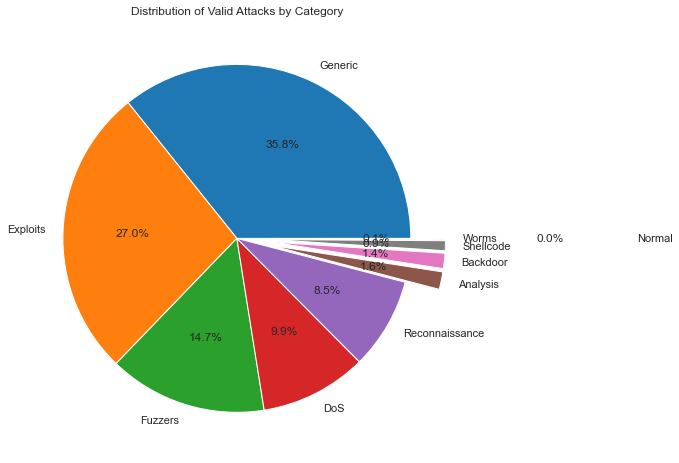

In [10]:
# Filter and count valid attacks
valid_attacks = df.loc[df['label'] == 1, 'attack_cat'].value_counts()
print(valid_attacks)

# Plot the data as a pie chart
plt.figure(figsize=(15, 8))
plt.pie(
    valid_attacks,
    labels=valid_attacks.index,
    autopct='%1.1f%%',
    explode=[0, 0, 0, 0, 0, 0.2, 0.2, 0.2, 0.2, 1.2]
)
plt.title("Distribution of Valid Attacks by Category")
plt.show()


In [11]:
from sklearn.model_selection import train_test_split

# Prepare features and target
X = df.drop(columns=['attack_cat', 'label'])
y = df['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# Get feature names
feature_names = X.columns.tolist()

# Display dataset shapes
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (180371, 42)
y_train shape: (180371,)
X_test shape: (77302, 42)
y_test shape: (77302,)


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier()

# Set up GridSearchCV with 5-fold cross-validation and scoring based on recall
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='recall')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Output the best parameters and the best recall score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best recall score: {grid_search.best_score_:.4f}")


Best parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best recall score: 1.0000


In [13]:
from sklearn.metrics import recall_score, accuracy_score

# Get the best estimator from the grid search
clf = grid_search.best_estimator_

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate and print the recall score
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")


Recall: 1.0000


:::::::> High Recall Rate Decision Tree Rules <::::::: 

|--- sttl <= 61.00
|   |--- sinpkt <= 0.00
|   |   |--- class: 1
|   |--- sinpkt >  0.00
|   |   |--- class: 0
|--- sttl >  61.00
|   |--- synack <= 0.04
|   |   |--- class: 1
|   |--- synack >  0.04
|   |   |--- class: 1



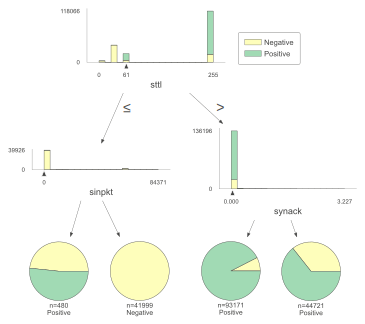

In [17]:
from sklearn.tree import export_text
import dtreeviz

# Print the decision tree rules with a more structured heading
print(":::::::> High Recall Rate Decision Tree Rules <::::::: \n")
tree_rules = export_text(clf, feature_names=feature_names)
print(tree_rules)

# Customize the tree visualization without unsupported arguments
viz_model = dtreeviz.model(
    clf,
    X_train=X_train,
    y_train=y_train,
    feature_names=feature_names,
    class_names=["Negative", "Positive"]  # Customize class labels
)

# Display the visualization with the customized settings
viz_model.view()


In [18]:
# Reset the index of X_test to ensure continuous indexing
X_test = X_test.reset_index(drop=True)

# Define the rule for filtering with more flexibility
rule = "(sttl <= 61.00 & sinpkt <= 0.00) | (sttl > 61.00)"

# Apply the filtering rule using query to identify matching indices
ind = X_test.query(rule).index

# Filter X_test and y_test according to the selected indices
X_test_filtered = X_test.loc[ind, :]
y_test_filtered = y_test[ind]

# Calculate the percentage of filtered data
percentage_filtered = (1 - np.round(X_test_filtered.shape[0] / X_test.shape[0], 2)) * 100

# Display the results in a user-friendly format
print(f"Original X_test shape: {X_test.shape}")
print(f"Filtered X_test shape: {X_test_filtered.shape}")
print(f"Percentage of filtered data: {percentage_filtered:.2f}%")

# Optional: Display first few rows of filtered data for verification
print("\nSample of filtered X_test:")
print(X_test_filtered.head())


Original X_test shape: (77302, 42)
Filtered X_test shape: (59425, 42)
Percentage of filtered data: 23.00%

Sample of filtered X_test:
         dur  proto  service  state  spkts  dpkts  sbytes  dbytes  \
0   0.358995    113        0      4     10      6    1526     268   
1   0.000009    119        2      5      2      0     114       0   
3   0.000001    119        2      5      2      0     114       0   
4   0.221826    113        0      4     10     10    1188    5174   
5  57.889004     78        0      7     60      0   16320       0   

           rate  sttl  ...  ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  \
0  4.178331e+01   254  ...           1                 1                 1   
1  1.111111e+05   254  ...          19                18                18   
3  1.000000e+06   254  ...          16                16                16   
4  8.565272e+01    62  ...           1                 1                 1   
5  1.019192e+00   254  ...           1                 1     

Model Evaluation Results:
--------------------------
Recall: 0.9971
Precision: 0.9989
Accuracy: 0.9967


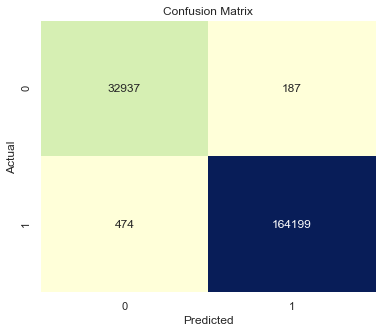

Evaluation Metrics: {'Recall': 0.9971215681987939, 'Precision': 0.9988624335405691, 'Accuracy': 0.9966581899624363}


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the model evaluation function
def model_evaluation(model, X_train, y_train, X_test_2, y_test_2):
    """
    Evaluates the given model using accuracy, precision, recall, and confusion matrix.

    Parameters:
    - model: The model to be evaluated.
    - X_train: Training feature data.
    - y_train: Training labels.
    - X_test_2: Filtered test feature data.
    - y_test_2: Filtered test labels.

    Returns:
    - A dictionary containing recall, precision, and accuracy scores.
    """
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions on the filtered test data
    y_pred = model.predict(X_test_2)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_2, y_pred)
    recall = recall_score(y_test_2, y_pred)
    precision = precision_score(y_test_2, y_pred)

    # Print evaluation results
    print(f"Model Evaluation Results:")
    print(f"--------------------------")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    
    # Create a confusion matrix heatmap
    cross = pd.crosstab(pd.Series(y_test_2, name='Actual'), pd.Series(y_pred, name='Predicted'))
    plt.figure(figsize=(6, 5))
    sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Return the evaluation metrics as part of a dictionary
    return {'Recall': recall, 'Precision': precision, 'Accuracy': accuracy}

# Example preparation of the data
# Assuming you have the dataset df that contains the 'attack_cat', 'label', etc.

# Prepare X_train and y_train (Use appropriate features and labels from your dataset)
X_train = df.drop(columns=['attack_cat', 'label'])  # Features for training
y_train = df['label'].values  # Labels for training

# Filter out rows based on certain conditions for X_test_2
X_test = df.drop(columns=['attack_cat', 'label'])
y_test = df['label'].values

# Apply some filter for X_test_2 (example rule based on 'sttl' and 'sinpkt' columns)
X_test = X_test.reset_index(drop=True)
rules = "(sttl <= 61.00 & sinpkt <= 0.00) | (sttl > 61.00)"
ind = X_test.query(rules).index
X_test_2 = X_test.loc[ind, :]
y_test_2 = y_test[ind]

# Define the DecisionTreeClassifier model
model = DecisionTreeClassifier(random_state=42)

# Example usage of the evaluation function
results = model_evaluation(model, X_train, y_train, X_test_2, y_test_2)

# Print the results (optional)
print("Evaluation Metrics:", results)


Model Evaluation Results:
--------------------------
Recall: 0.9978
Precision: 0.9982
Accuracy: 0.9967


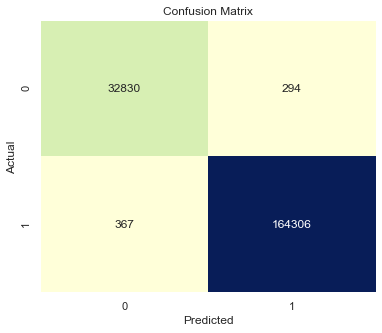

Evaluation Metrics for Random Forest Model: {'Recall': 0.9977713407783911, 'Precision': 0.9982138517618468, 'Accuracy': 0.9966581899624363}


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define the model evaluation function
def model_evaluation(model, X_train, y_train, X_test_2, y_test_2):
    """
    Evaluates the given model using accuracy, precision, recall, and confusion matrix.

    Parameters:
    - model: The model to be evaluated.
    - X_train: Training feature data.
    - y_train: Training labels.
    - X_test_2: Filtered test feature data.
    - y_test_2: Filtered test labels.

    Returns:
    - A dictionary containing recall, precision, and accuracy scores.
    """
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions on the filtered test data
    y_pred = model.predict(X_test_2)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_2, y_pred)
    recall = recall_score(y_test_2, y_pred)
    precision = precision_score(y_test_2, y_pred)

    # Print evaluation results
    print(f"Model Evaluation Results:")
    print(f"--------------------------")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    
    # Create a confusion matrix heatmap
    cross = pd.crosstab(pd.Series(y_test_2, name='Actual'), pd.Series(y_pred, name='Predicted'))
    plt.figure(figsize=(6, 5))
    sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Return the evaluation metrics as part of a dictionary
    return {'Recall': recall, 'Precision': precision, 'Accuracy': accuracy}

# Example preparation of the data (same steps as before)
X_train = df.drop(columns=['attack_cat', 'label'])  # Features for training
y_train = df['label'].values  # Labels for training

# Filter out rows based on certain conditions for X_test_2
X_test = df.drop(columns=['attack_cat', 'label'])
y_test = df['label'].values

# Apply some filter for X_test_2 (example rule based on 'sttl' and 'sinpkt' columns)
X_test = X_test.reset_index(drop=True)
rules = "(sttl <= 61.00 & sinpkt <= 0.00) | (sttl > 61.00)"
ind = X_test.query(rules).index
X_test_2 = X_test.loc[ind, :]
y_test_2 = y_test[ind]

# Define the RandomForestClassifier model
rf = RandomForestClassifier(random_state=11)

# Example usage of the evaluation function for Random Forest
results = {}
results['Random Forest Model'] = model_evaluation(rf, X_train, y_train, X_test_2, y_test_2)

# Print the results for Random Forest model
print("Evaluation Metrics for Random Forest Model:", results['Random Forest Model'])


In [25]:
from sklearn.tree import export_text
import pandas as pd

# Assuming X_train is your training data and feature_names are defined
# Print the decision rules of the 100th decision tree in the RandomForest

# Customize the output of the tree rules by selecting the 100th estimator (tree) in the Random Forest
tree_index = 99  # 100th tree (0-indexed)
tree_rules = export_text(rf.estimators_[tree_index], feature_names=feature_names)

# Print the decision rules with a more descriptive header
print(f":::::::> Decision Tree Rules for Tree {tree_index+1} <::::::: \n")
print(tree_rules)


:::::::> Decision Tree Rules for Tree 100 <::::::: 

|--- dpkts <= 0.50
|   |--- ct_srv_src <= 2.50
|   |   |--- sbytes <= 53.00
|   |   |   |--- sinpkt <= 30000.00
|   |   |   |   |--- sbytes <= 26.00
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- sbytes >  26.00
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- sinpkt >  30000.00
|   |   |   |   |--- class: 0.0
|   |   |--- sbytes >  53.00
|   |   |   |--- rate <= 0.10
|   |   |   |   |--- sttl <= 159.00
|   |   |   |   |   |--- ct_state_ttl <= 1.00
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- ct_state_ttl >  1.00
|   |   |   |   |   |   |--- proto <= 38.50
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- proto >  38.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- sttl >  159.00
|   |   |   |   |   |--- state <= 3.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- state >  3.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |--- rate > 

Model Evaluation Results:
--------------------------
Recall: 0.9503
Precision: 0.9476
Accuracy: 0.9149


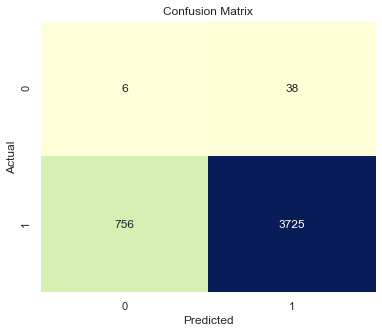

Evaluation Metrics: {'XGBoost Classifier': {'Recall': 0.9502738892270237, 'Precision': 0.947563270012745, 'Accuracy': 0.9148558982930659}}


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from xgboost import XGBClassifier

# Define the model evaluation function
def model_evaluation(model, X_train, y_train, X_test_2, y_test_2):
    """
    Evaluates the given model using accuracy, precision, recall, and confusion matrix.

    Parameters:
    - model: The model to be evaluated.
    - X_train: Training feature data.
    - y_train: Training labels.
    - X_test_2: Filtered test feature data.
    - y_test_2: Filtered test labels.

    Returns:
    - A dictionary containing recall, precision, and accuracy scores.
    """
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions on the filtered test data
    y_pred = model.predict(X_test_2)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test_2, y_pred)
    recall = recall_score(y_test_2, y_pred)
    precision = precision_score(y_test_2, y_pred)

    # Print evaluation results
    print(f"Model Evaluation Results:")
    print(f"--------------------------")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    
    # Create a confusion matrix heatmap
    cross = pd.crosstab(pd.Series(y_test_2, name='Actual'), pd.Series(y_pred, name='Predicted'))
    plt.figure(figsize=(6, 5))
    sns.heatmap(cross, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Return the evaluation metrics as part of a dictionary
    return {'Recall': recall, 'Precision': precision, 'Accuracy': accuracy}

# Initialize the XGBClassifier
xgbc = XGBClassifier(random_state=42)

# Ensure df is your DataFrame with the correct columns
# Here we assume `df` has 'attack_cat' and 'label' columns
# Make sure 'label' is the target variable
X = df.drop(columns=['attack_cat', 'label'])
y = df['label']

# Split the data into training and testing sets (train/test split is necessary)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply some filter for X_test_2 (same example rule as before)
X_test = X_test.reset_index(drop=True)
rules = "(sttl <= 61.00 & sinpkt <= 0.00) | (sttl > 61.00)"
ind = X_test.query(rules).index
X_test_2 = X_test.loc[ind, :]
y_test_2 = y_test.iloc[ind]  # Ensure y_test_2 is a 1D array

# Evaluate the XGBoost model
results = {}
results['XGBoost Classifier'] = model_evaluation(xgbc, X_train, y_train, X_test_2, y_test_2)

# Print the results
print("Evaluation Metrics:", results)


In [47]:
# Import necessary libraries
import lightgbm as lgb
from lightgbm import LGBMClassifier  # Corrected this line
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Function to evaluate the model
def model_evaluation(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    
    # Return the results as a dictionary
    return {
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'classification_report': report
    }

# Split your data into training and testing sets
# Assuming X and y are your features and labels, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the LightGBM Classifier
lgbc = LGBMClassifier()

# Run the model evaluation and store results in a dictionary
results = {}
results['Light GBM Classifier'] = model_evaluation(lgbc, X_train, X_test, y_train, y_test)

# Output the evaluation results
print("Light GBM Classifier Evaluation Results:")
print("Accuracy:", results['Light GBM Classifier']['accuracy'])
print("Confusion Matrix:\n", results['Light GBM Classifier']['confusion_matrix'])
print("Classification Report:\n", results['Light GBM Classifier']['classification_report'])


Light GBM Classifier Evaluation Results:
Accuracy: 0.9453183617500194
Confusion Matrix:
 [[26320  1706]
 [ 2521 46755]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93     28026
           1       0.96      0.95      0.96     49276

    accuracy                           0.95     77302
   macro avg       0.94      0.94      0.94     77302
weighted avg       0.95      0.95      0.95     77302



<Figure size 1440x864 with 0 Axes>

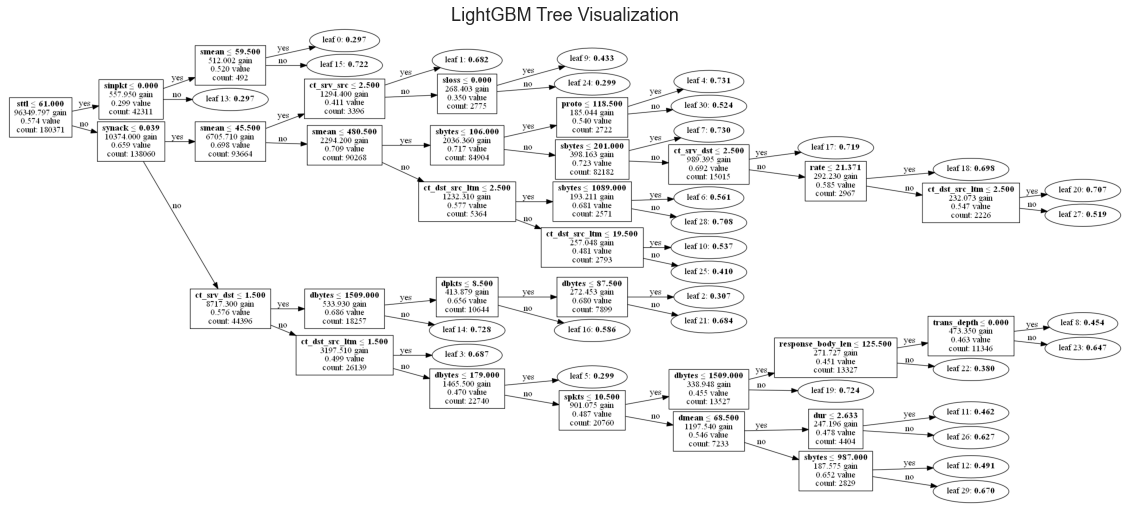

In [49]:
import lightgbm as lgb  # Use the alias lgb
import matplotlib.pyplot as plt

# Train the LightGBM model (if not already trained)
lgbc = LGBMClassifier()
lgbc.fit(X_train, y_train)  # Assuming X_train, y_train are defined

# Plot the first tree in the model
plt.figure(figsize=(20, 12))  # Customize the size of the plot

# Plot the tree (you can change the tree index to plot different trees)
lgb.plot_tree(lgbc, tree_index=0, figsize=(20,12), show_info=['split_gain', 'internal_value', 'internal_count'])

# Customize the appearance
plt.title('LightGBM Tree Visualization', fontsize=18)
plt.show()


         accuracy  precision
Model 1    0.9967     0.9989
Model 2    0.9967     0.9982
Model 3    0.9500     0.9600
Index(['accuracy', 'precision'], dtype='object')


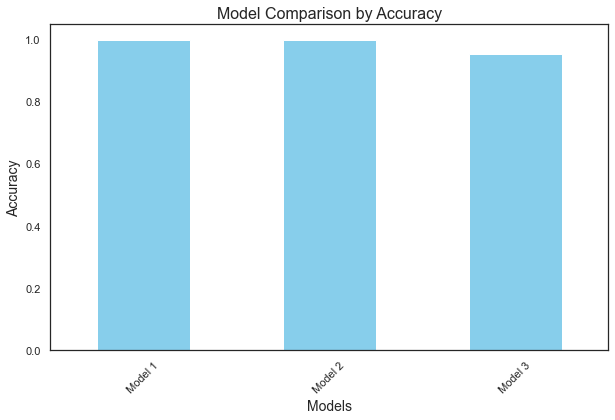

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'results' contains the evaluation data in the form of a dictionary
# Example structure: results = {'Model 1': {'accuracy': 0.85, 'precision': 0.83}, 
#                               'Model 2': {'accuracy': 0.88, 'precision': 0.87}}

# Example results dictionary (you should replace this with your actual 'results')
results = {
    'Model 1': {'accuracy': 0.9967, 'precision': 0.9989},
    'Model 2': {'accuracy': 0.9967, 'precision': 0.9982},
    'Model 3': {'accuracy': 0.95, 'precision': 0.96}
}

# Convert the results dictionary to a DataFrame
comparision = pd.DataFrame(results).T  # Use .T to transpose and get models as rows

# Print the structure of the results DataFrame to check the columns
print(comparision.head())
print(comparision.columns)

# If accuracy is inside a nested structure, applymap will extract it
# No need for 'applymap' if 'accuracy' is directly available
# Plotting the comparison for 'accuracy'
comparision_sorted = comparision.sort_values(by='accuracy', ascending=False)

# Plotting the comparison (e.g., bar chart for accuracy of each model)
comparision_sorted['accuracy'].plot(kind='bar', figsize=(10, 6), color='skyblue')

# Add title and labels
plt.title('Model Comparison by Accuracy', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45)
plt.show()
